In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [13]:
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)


scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
val_images = scaler.transform(val_images)
test_images = scaler.transform(test_images)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7866 - loss: 0.6103 - val_accuracy: 0.8607 - val_loss: 0.3947
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8638 - loss: 0.3794 - val_accuracy: 0.8717 - val_loss: 0.3578
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8749 - loss: 0.3378 - val_accuracy: 0.8673 - val_loss: 0.3644
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8846 - loss: 0.3163 - val_accuracy: 0.8766 - val_loss: 0.3447
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8870 - loss: 0.3024 - val_accuracy: 0.8827 - val_loss: 0.3345
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8955 - loss: 0.2832 - val_accuracy: 0.8817 - val_loss: 0.3364
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9025 - loss: 0.2680 - val_accuracy: 0.8757 - val_loss: 0.3537
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9043 - loss: 0.

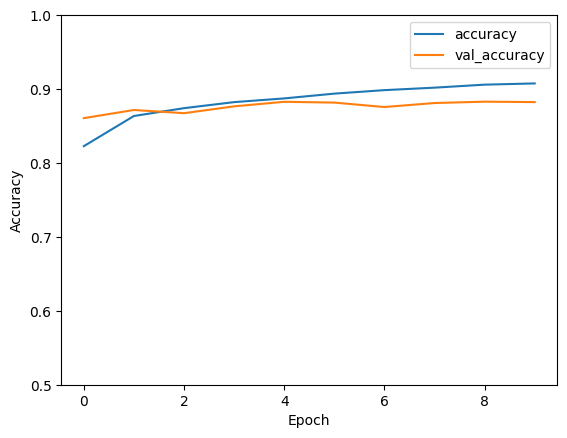

In [16]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28*28, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()


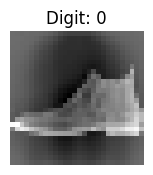

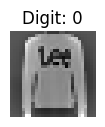

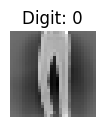

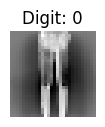

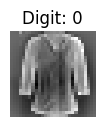

In [17]:
def display_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 4))

    for i in range(5):  # Displaying 5 examples
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {np.argmax(labels[i])}")
        plt.axis('off')
        if predictions is not None:
            plt.subplot(2, 5, i + 6)
            plt.bar(range(10), predictions[i])
            plt.title(f"Prediction: {np.argmax(predictions[i])}")
            plt.xticks(range(10))
        plt.show()
display_images(test_images, test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


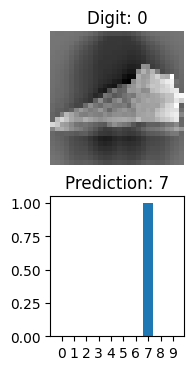

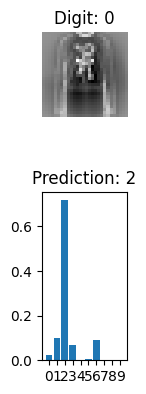

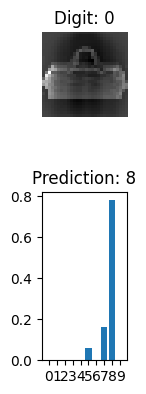

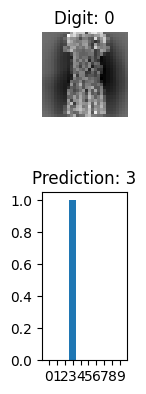

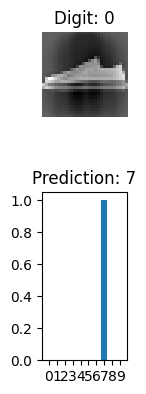

In [18]:
subset_indices = np.random.choice(len(test_images), size=5,
replace=False)
subset_images = test_images[subset_indices]
subset_labels = test_labels[subset_indices]
predictions = model.predict(subset_images)
display_images(subset_images, subset_labels, predictions)